# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [151]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [152]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [153]:
info = f"""
iris key值: {iris.keys()}
iris 檔案位置: {iris["filename"]}
前10筆資料: \n{iris.data[0:10]}\n
查看資料型別: {type(iris.data)}
樣本類別資料: {iris.target}
樣本類別名稱: {iris.target_names}
"""
print(info)


iris key值: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris 檔案位置: iris.csv
前10筆資料: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

查看資料型別: <class 'numpy.ndarray'>
樣本類別資料: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
樣本類別名稱: ['setosa' 'versicolor' 'virginica']



In [154]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [155]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [156]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [157]:
print(f'target names: {str(iris["target_names"])}')

target names: ['setosa' 'versicolor' 'virginica']


In [158]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [159]:
#合併資料特徵欄位與目標欄位
from pandas.core.frame import DataFrame


iris_data: DataFrame = pd.concat([x, y], axis=1)
iris_data = iris_data[["sepal length (cm)", "petal length (cm)", "target"]]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [160]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data["target"].isin([0,1])]
iris_data
print(iris.data.size/len(iris.feature_names))

150.0


## 切分訓練集與測試集
> train_test_split()

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[["sepal length (cm)", "petal length (cm)"]], iris_data[['target']], test_size=0.2)

In [205]:
X_train.head()
# X_train.shape

,sepal length (cm),petal length (cm)
50,7.0,4.7
27,5.2,1.5
55,5.7,4.5
30,4.8,1.6
22,4.6,1.0


In [206]:
X_test.head()
# X_test.shape

,sepal length (cm),petal length (cm)
65,6.7,4.4
94,5.6,4.2
69,5.6,3.9
57,4.9,3.3
1,4.9,1.4


In [207]:
Y_train.head()



,target
50,1
27,0
55,1
30,0
22,0


In [211]:
Y_test.head()
Y_test.shape


(20, 1)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [212]:
from IPython.display import Math
Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [213]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [231]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs, axis=0)
    sigma = np.std(dfs, axis=0)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    print(f'\nm: {m}, \nM: {M}, \nmu: {mu}, \ns: {s}')
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [233]:
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
arr_x_test


m: 1.3, 
M: 6.9, 
mu: sepal length (cm)    5.415
petal length (cm)    2.680
dtype: float64, 
s: sepal length (cm)    0.655191
petal length (cm)    1.438958
dtype: float64


array([[ 1.96126071,  1.19530942],
       [ 0.28236049,  1.05631995],
       [ 0.28236049,  0.84783575],
       [-0.78603056,  0.43086735],
       [-0.78603056, -0.88953259],
       [ 0.1297332 , -0.88953259],
       [-0.02289409, -0.95902733],
       [-1.54916702, -0.88953259],
       [-0.63340327, -0.88953259],
       [ 0.1297332 ,  0.91733049],
       [-1.54916702, -0.95902733],
       [-0.48077597, -0.82003786],
       [ 2.2665153 ,  1.54278309],
       [-0.78603056, -0.88953259],
       [-0.17552139, -0.82003786],
       [-0.32814868, -0.88953259],
       [ 0.28236049,  0.98682522],
       [ 1.04549696,  1.33429889],
       [ 1.35075154,  1.40379362],
       [-0.63340327, -0.82003786]])

In [232]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train


m: 1.0, 
M: 7.0, 
mu: sepal length (cm)    5.48500
petal length (cm)    2.90625
dtype: float64, 
s: sepal length (cm)    0.633463
petal length (cm)    1.439561
dtype: float64


array([[ 2.39161672,  1.24603957],
       [-0.4499081 , -0.97686029],
       [ 0.33940435,  1.10710833],
       [-1.08135806, -0.90739467],
       [-1.39708304, -1.3241884 ],
       [ 0.49726684,  0.69031461],
       [ 0.81299182,  0.75978023],
       [ 1.91802925,  1.24603957],
       [ 1.1287168 ,  0.96817709],
       [ 1.76016676,  1.17657395],
       [ 1.60230427,  1.17657395],
       [-0.60777059, -1.04632591],
       [-1.39708304, -1.04632591],
       [-1.39708304, -0.97686029],
       [ 0.33940435,  0.82924585],
       [-0.60777059, -0.90739467],
       [-0.60777059, -0.97686029],
       [-0.76563308,  0.41245212],
       [-0.13418312, -0.97686029],
       [-0.76563308, -0.90739467],
       [-0.13418312,  1.10710833],
       [-0.76563308, -1.11579153],
       [ 0.97085431,  1.24603957],
       [ 0.02367937,  0.75978023],
       [-0.13418312, -0.97686029],
       [-0.60777059, -0.69899781],
       [-1.08135806, -1.04632591],
       [ 0.97085431,  1.24603957],
       [ 0.97085431,

In [234]:
stats = norm_stats(Y_test)
arr_y_test = np.array(z_score(Y_test, stats))
arr_y_test


m: 0, 
M: 1, 
mu: target    0.45
dtype: float64, 
s: target    0.497494
dtype: float64


array([[ 1.1055416 ],
       [ 1.1055416 ],
       [ 1.1055416 ],
       [ 1.1055416 ],
       [-0.90453403],
       [-0.90453403],
       [-0.90453403],
       [-0.90453403],
       [-0.90453403],
       [ 1.1055416 ],
       [-0.90453403],
       [-0.90453403],
       [ 1.1055416 ],
       [-0.90453403],
       [-0.90453403],
       [-0.90453403],
       [ 1.1055416 ],
       [ 1.1055416 ],
       [ 1.1055416 ],
       [-0.90453403]])

In [235]:
stats = norm_stats(Y_train)
arr_y_train = np.array(z_score(Y_train, stats))
arr_y_train


m: 0, 
M: 1, 
mu: target    0.5125
dtype: float64, 
s: target    0.499844
dtype: float64


array([[ 0.97530483],
       [-1.02532046],
       [ 0.97530483],
       [-1.02532046],
       [-1.02532046],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [-1.02532046],
       [-1.02532046],
       [-1.02532046],
       [ 0.97530483],
       [-1.02532046],
       [-1.02532046],
       [ 0.97530483],
       [-1.02532046],
       [-1.02532046],
       [ 0.97530483],
       [-1.02532046],
       [ 0.97530483],
       [ 0.97530483],
       [-1.02532046],
       [-1.02532046],
       [-1.02532046],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [-1.02532046],
       [-1.02532046],
       [-1.02532046],
       [-1.02532046],
       [ 0.97530483],
       [ 0.97530483],
       [-1.02532046],
       [ 0.97530483],
       [ 0.97530483],
       [-1.02532046],
       [ 0.97530483],
       [ 0.97530483],
       [ 0.97530483],
       [-1

## use sklearn

In [236]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.485   2.90625]
[0.63346271 1.43956102]


In [241]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 2.39161672,  1.24603957],
       [-0.4499081 , -0.97686029],
       [ 0.33940435,  1.10710833],
       [-1.08135806, -0.90739467],
       [-1.39708304, -1.3241884 ]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [242]:
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])

[[ 1.96126071  1.19530942]
 [ 0.28236049  1.05631995]
 [ 0.28236049  0.84783575]
 [-0.78603056  0.43086735]
 [-0.78603056 -0.88953259]
 [ 0.1297332  -0.88953259]
 [-0.02289409 -0.95902733]
 [-1.54916702 -0.88953259]
 [-0.63340327 -0.88953259]
 [ 0.1297332   0.91733049]]


you can also use fit_transform method (i.e., fit and then transform)    

In [243]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[ 1.96126071  1.19530942]
 [ 0.28236049  1.05631995]
 [ 0.28236049  0.84783575]
 [-0.78603056  0.43086735]
 [-0.78603056 -0.88953259]
 [ 0.1297332  -0.88953259]
 [-0.02289409 -0.95902733]
 [-1.54916702 -0.88953259]
 [-0.63340327 -0.88953259]
 [ 0.1297332   0.91733049]]


In [244]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.68309400526793
29.937429517066924


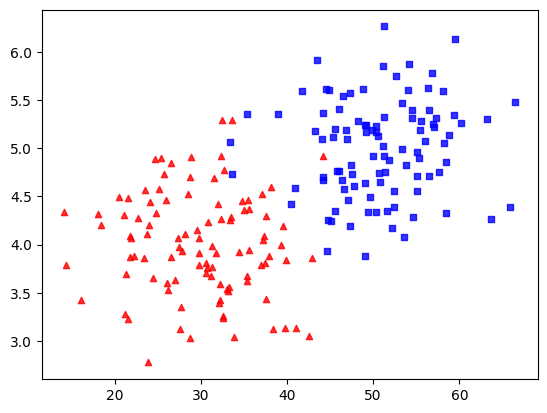

In [249]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [250]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [251]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [252]:
minmax_norm(x_val[:10])

array([0.        , 0.64196016, 1.        , 0.62830989, 0.98825969,
       0.28521997, 0.54659409, 0.90587641, 0.07932249, 0.88090766])

In [253]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) #1D -> 2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200,)
(200, 1)
[66.48060633]
[[0.36710781]
 [0.67442474]
 [0.84582432]
 [0.66789013]
 [0.84020404]
 [0.50364732]
 [0.62877143]
 [0.80076581]
 [0.40508079]
 [0.78881285]]
